# Reactor design based on linear model

In [4]:
# data is given in the question:
#second order:
#can do it 1/Ca = 1/Ca0 + Kt

In [5]:
import numpy as np
time_array = np.array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])
CA_inv_array = np.array([0.09955774, 0.10041539, 0.10164106, 0.10040534, 0.10151214,
       0.1027833 , 0.10252228, 0.10259392, 0.10369246, 0.10371607,
       0.10400771, 0.10517007, 0.10549644, 0.10558765, 0.10639114,
       0.10600782, 0.10506377, 0.10734534, 0.10655902, 0.10820498,
       0.1077726 , 0.10985819, 0.10912644, 0.11053292, 0.10939707])

In [6]:
import pandas as pd
#data = pd.DataFrame({'time': time_array,'CA_INV': CA_inv_array})
#data.head
data = pd.DataFrame()
data['time']= time_array
data['CaInversed'] = CA_inv_array

In [7]:
data.head()

,time,CaInversed
0,0.000000,0.099558
1,0.416667,0.100415
2,0.833333,0.101641
3,1.250000,0.100405
4,1.666667,0.101512


In [8]:
#Get an insight
data.describe()

,time,CaInversed
count,25.000000,25.000000
mean,5.000000,0.105014
std,3.066584,0.003139
min,0.000000,0.099558
25%,2.500000,0.102594
50%,5.000000,0.105170
75%,7.500000,0.107345
max,10.000000,0.110533


## Explore data:

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

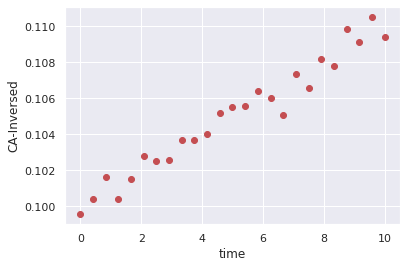

In [10]:
plt.scatter(time_array,CA_inv_array, c= 'r')
plt.xlabel('time')
plt.ylabel('CA-Inversed')
plt.show()

**from the data: it is obvious that we are dealing with a linear model as we supposed**

In [11]:
#we can use the OLS model or others
# for now, I will use the OLS model and statsmodel.api library
#later, I will use sklearn library
#In normal and big data w should work on testing/validating/training/checking OLS conditions
#for now and for simplicity: will skip these

In [12]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
#declaring variables:
x1 = data['time']
y = data['CaInversed']

## Build Regression

In [14]:
x = sm.add_constant(x1)
reg = sm.OLS(y,x)
results = reg.fit()

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CaInversed   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     535.6
Date:                Sat, 06 Feb 2021   Prob (F-statistic):           1.96e-17
Time:                        10:27:44   Log-Likelihood:                 149.01
No. Observations:                  25   AIC:                            -294.0
Df Residuals:                      23   BIC:                            -291.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1000      0.000    395.879      0.000       0.099       0.101
time           0.0010   4.33e-05     23.143      0.000       0.001       0.001
==============================================================================
Omnibus:                        1.708   Durbin-Watson:                   2.462
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                0.957
Skew:                          -0.478   Prob(JB):                        0.620
Kurtosis:                       3.072   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#SO:
k = 0.001
Ca0_inv = 0.1
Ca0= 1/Ca0_inv
print ("the value of Ca0 is: ", Ca0, "\n","the value of K is: ", k)

the value of Ca0 is:  10.0 
 the value of K is:  0.001


In [17]:
#use sklearn nut keep it for later

## sKLEARN:

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [21]:
x = np.array(x1).reshape(-1,1)
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
reg.coef_

array([0.00100219])

In [23]:
reg.intercept_

0.10000349147708079

In [37]:
 Ca = np.ones (len(time_array))
 for i in range (len (time_array)):
   t = data['time'][i]
   Ca[i] = 1/((reg.intercept_)+(reg.coef_*t))


In [38]:
Ca

array([9.99965086, 9.95806955, 9.91683262, 9.87593581, 9.83537493,
       9.79514585, 9.75524453, 9.71566697, 9.67640925, 9.63746751,
       9.59883795, 9.56051683, 9.52250046, 9.48478523, 9.44736758,
       9.410244  , 9.37341103, 9.33686527, 9.30060338, 9.26462207,
       9.22891808, 9.19348823, 9.15832937, 9.1234384 , 9.08881228])

<function matplotlib.pyplot.show>

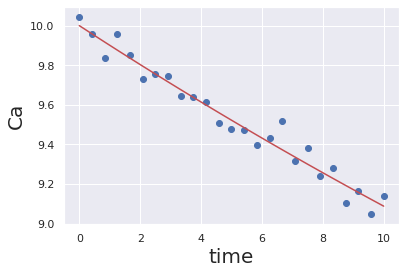

In [39]:

plt.scatter (time_array,1/CA_inv_array)
plt.xlabel('time',fontsize = 20)
plt.ylabel('Ca', fontsize = 20)
plt.plot (time_array, Ca, c= 'r')
plt. show